<a href="https://colab.research.google.com/github/Xergon-sci/Predicting-chemical-hardness-A-study-using-machine-learning-and-artificial-neural-networks/blob/master/Utillities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-05-01 13:27:26--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-05-01 13:27:26--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   183MB/s    in 0.4s    

2020-05-01 13:27:27 (183 MB/s) - ‘Miniconda3-latest-Linux

In [ ]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw

In [ ]:
!pip freeze

asn1crypto==1.3.0
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
conda==4.8.3
conda-package-handling==1.6.0
cryptography==2.8
idna==2.8
numpy==1.18.1
olefile==0.46
pandas==1.0.3
Pillow==7.0.0
pycairo==1.19.1
pycosat==0.6.3
pycparser==2.19
pyOpenSSL==19.1.0
PySocks==1.7.1
python-dateutil==2.8.1
pytz==2020.1
requests==2.22.0
ruamel-yaml==0.15.87
six==1.14.0
tqdm==4.42.1
urllib3==1.25.8


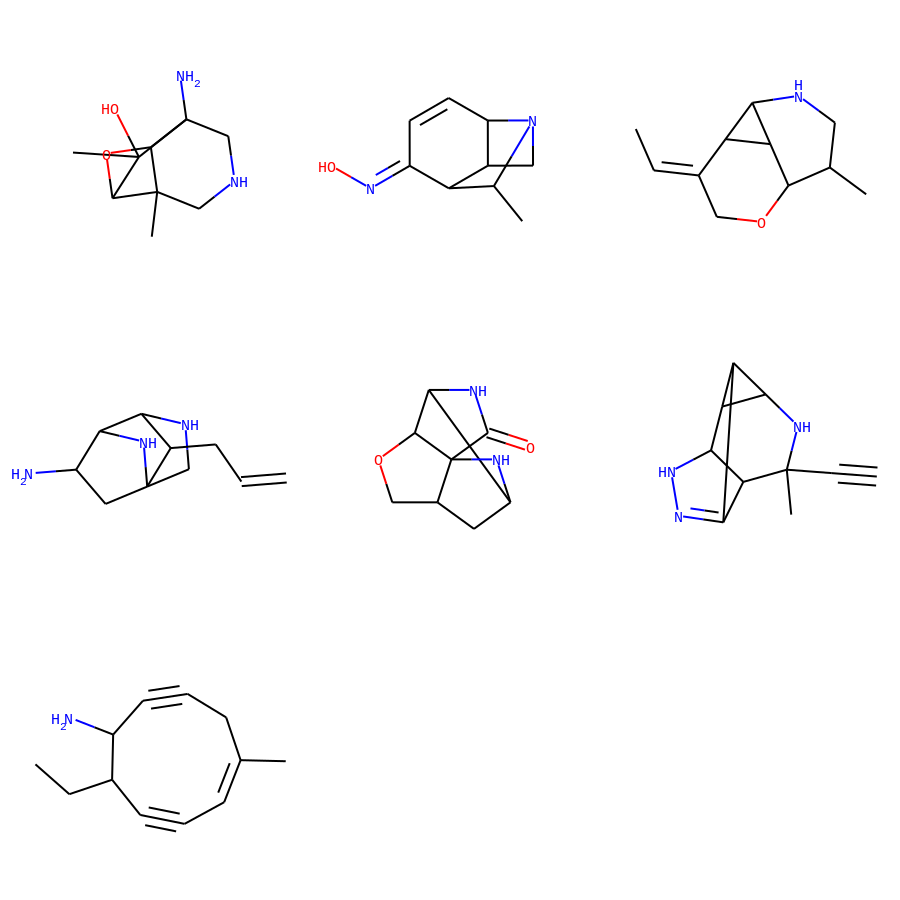

In [ ]:
molecules = []
molecules.append(Chem.MolFromSmiles('CC12CNCC3(N)C1OC2C3(C)O'))
molecules.append(Chem.MolFromSmiles('CC1C2C3CN1C3C=CC2=NO'))
molecules.append(Chem.MolFromSmiles('CC=C1COC2C3C(NCC2C)C13'))
molecules.append(Chem.MolFromSmiles('NC1CC23CNC(C2CC=C)C1N3'))
molecules.append(Chem.MolFromSmiles('O=C1NC2C3CC4COC2C14N3'))
molecules.append(Chem.MolFromSmiles('CC1(NC2C3C2C2=NNC3C12)C#C'))
molecules.append(Chem.MolFromSmiles('CCC1C#CC=C(C)CC#CC1N'))


Chem.Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(300,300))

# Group 1a and 2b structure display

In [ ]:
df = pd.read_table("/content/drive/My Drive/vub/dataset_input.txt", sep='\t')

group1a = df.loc[(df['n'] >= 2.5) & (df['n'] <= 3.5)]
group2b = df.loc[(df['n'] >= 6) & (df['n'] <= 8)]

group1a = group1a[['smiles']]
group2b = group2b[['smiles']]

group1a = group1a.values.flatten()
group2b = group2b.values.flatten()

FileNotFoundError: ignored

## Group 1a

In [ ]:
mols1a = []

for smi in group1a:
  mols1a.append(Chem.MolFromSmiles(smi))

Chem.Draw.MolsToGridImage(mols1a, molsPerRow=5, subImgSize=(300,300))

## Group 2b

# Similarity search



In [ ]:
from rdkit import Chem,DataStructs
mol1 = Chem.MolFromSmiles("CC(C)C=CCCCCC(=O)NCc1ccc(c(c1)OC)O")
mol2 = Chem.MolFromSmiles("COC1=C(C=CC(=C1)C=O)O")
 
# the default fingerprint is path-based:
fp1 = Chem.RDKFingerprint(mol1)
fp2 = Chem.RDKFingerprint(mol2)
print ("RDK fingerprint: ", DataStructs.TanimotoSimilarity(fp1,fp2))
 
# the Morgan fingerprint (similar to ECFP) is also useful:
from rdkit.Chem import rdMolDescriptors
mfp1 = rdMolDescriptors.GetMorganFingerprint(mol1,2)
mfp2 = rdMolDescriptors.GetMorganFingerprint(mol2,2)
print ("Morgan fingerprint: ",DataStructs.DiceSimilarity(mfp1,mfp2))